Why encode features?

1. Categorical variables: Many machine learning algorithms can't handle categorical variables (e.g., text labels) directly. Encoding converts these variables into numerical representations that algorithms can process.
2. Ordinal relationships: Encoding can preserve ordinal relationships between categories (e.g., "low," "medium," "high").

When to encode features?

1. Categorical features: If your data contains categorical features (e.g., gender, color, country), encoding is necessary.
2. Text data: If your data includes text features (e.g., words, phrases), encoding is required.

Common encoding techniques:

1. Label Encoding: assigns a unique integer to each category.
2. One-Hot Encoding: creates binary vectors for each category.
3. Ordinal Encoding: assigns numerical values based on ordinal relationships.

When not to encode?

1. Numerical features: If your features are already numerical and continuous (e.g., age, price), encoding might not be necessary.

In summary, feature encoding is essential for categorical and text data, but not always necessary for numerical features. The choice of encoding technique depends on the specific problem and data type.

Here are some common types of encoding techniques used in machine learning and data preprocessing:

Categorical Encoding

1. Label Encoding: assigns a unique integer to each category (e.g., 0, 1, 2, ...).
2. One-Hot Encoding: creates binary vectors for each category (e.g., [0, 0, 1] for category 3).
3. Ordinal Encoding: assigns numerical values based on ordinal relationships (e.g., "low" = 1, "medium" = 2, "high" = 3).
4. Binary Encoding: represents categories as binary numbers (e.g., 1 = 001, 2 = 010, 3 = 011).

Text Encoding

1. Bag-of-Words: represents text as a vector of word frequencies.
2. Term Frequency-Inverse Document Frequency (TF-IDF): weights word frequencies by importance.
3. Word Embeddings: represents words as dense vectors in a high-dimensional space (e.g., Word2Vec, GloVe).

Other Encoding Techniques

1. Hash Encoding: uses a hash function to map categories to numerical values.
2. Count Encoding: represents categories by their frequency count.
3. Target Encoding: encodes categories based on the target variable's mean or median value.

The choice of encoding technique depends on the specific problem, data type, and machine learning algorithm used.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#data
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
data['class'].value_counts()
data['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

`Label Encoding`

In [58]:
#import libraries from the sklear
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder

In [59]:
#apply the label-Encoding on the column alive
label_encoder = LabelEncoder()
data['alive_encode'] = label_encoder.fit_transform(data['alive'])
data['alive_encode'].value_counts()
data.head()

#that how we can encode the categorical variable into numeric values using the label encoder we can all the values here i show only 1 the rest we can encode using the other techniques.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alive_encode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


`Ordinal Encoding`

In [60]:
#lets apply the ordinal encoding on the embark_town

#check its counts
data['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

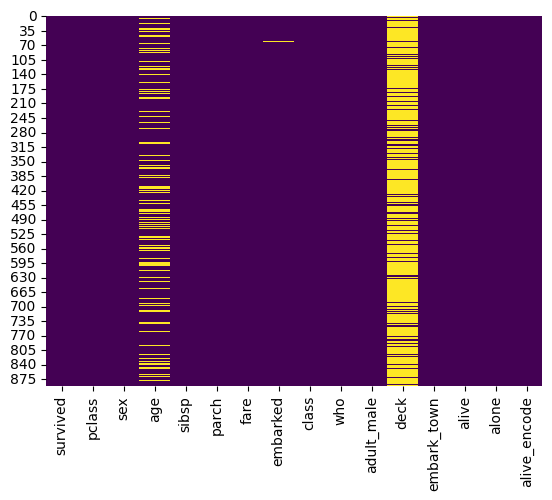

encode_embarkTown
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [61]:
#We have 3 categories lets encode them

#handle the missing value
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

#encoding the embark town
ordinal_encode = OrdinalEncoder(categories=[['Southampton','Cherbourg','Queenstown']])
data['encode_embarkTown'] = ordinal_encode.fit_transform(data[['embark_town']])
data['encode_embarkTown'].value_counts()

`One-Hot Encoding`
We use this generally when we have the multiple categories

In [62]:
data.head()

one_hot_encoder = OneHotEncoder()
data['alone'] = one_hot_encoder.fit_transform(data[['alone']]).toarray()
data['alone'].value_counts()


# Create a new DataFrame with the encoded columns
# encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the original DataFrame with the encoded DataFrame
# data = pd.concat([data, encoded_df], axis=1)

# #lets do the one hot encodding on the alone feature/column
# print(data['alone'].value_counts()
# )
# #in alone column we dont have any missing value lets encode it
# one_hot_encoder = OneHotEncoder()
# data['encode_alone'] = one_hot_encoder.fit_transform(data[['alone']]).toarray()

# data['encode_alone']


alone
0.0    537
1.0    354
Name: count, dtype: int64

`Binary Encoding`

In [ ]:
%pip install category_encoders
from category_encoders import BinaryEncoder

In [67]:
#lets encode the data with binary encoder

#i am creatung the titanic data again on purpose.
data = sns.load_dataset('titanic')
print(data.head())

#lets apply on the sex
binary_encoder = BinaryEncoder()
age_binary_encode = binary_encoder.fit_transform(data['sex'])
age_binary_encode


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


,sex_0,sex_1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


`There are alot other feature Encoding Techniques there`